# Prediction pizza's price 

---

<br>**Work flow for this notebook :**<br>
<ul>
<li>Data Collecting</li>
<li>Explore Data</li>
<li>Data Preprocessing</li>
<li>Data Visualization</li>
<li>Exploratory Data Analysis</li>
<li>Model Developing</li>
<li>Model Evaluation</li><br>
</ul>

# Collecting Data

---


Collecting data from github. Its a dummy dataset based on variant, size, toppings etc. Lets dive in data



In [1]:
# importing required module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [2]:
url = 'https://github.com/mdimran1/Dataset/blob/main/pizza_price.csv?raw=true'
data = pd.read_csv(url)

In [3]:

print(f'Total no. of rows : {data.shape[0]}')
print(f'Total no. of columns : {data.shape[1]}')

Total no. of rows : 129
Total no. of columns : 8


In [4]:
# at a glance dataset

data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


# Data Pre-Processing

In [5]:
# finding null values:
data.isnull().any() # its okay

company         False
price_rupiah    False
diameter        False
topping         False
variant         False
size            False
extra_sauce     False
extra_cheese    False
dtype: bool

## Removing duplicacy records

In [6]:
# Duplicate records checking
data[data.duplicated(subset = data.columns, keep = 'first') == True]

# removing duplicate records
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True) #re-indexing

## Renaming columns label

In [7]:
data.rename(columns = {'price_rupiah':'Price','company':'Company','diameter':'Diameter','variant':'Variant','size':'Size','extra_sauce':'Extra_sauce','extra_cheese':'Extra_cheese'}, inplace = True)

## Data formating

In [8]:
# Price column contains as Rp235,000	
# Remove 'Rp', ',' and change data type in float format 

data['Price']=data['Price'].str.replace('Rp','').str.replace(',','')
data['Price'] = data.Price.astype(float)


In [9]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       126 non-null    object 
 1   Price         126 non-null    float64
 2   Diameter      126 non-null    float64
 3   topping       126 non-null    object 
 4   Variant       126 non-null    object 
 5   Size          126 non-null    object 
 6   Extra_sauce   126 non-null    object 
 7   Extra_cheese  126 non-null    object 
dtypes: float64(2), object(6)
memory usage: 8.0+ KB


# Exloratory Data Analysis (Visualization)

---
<br>**Insight Summery :**

*   Company A is top for expensive product producing. It has only Two sizes
*   Company D has more Sizes Pizza.
*  Most of Pizzas is in Medium Sizes.
* Extra Cheese and Sauces is New trends for pizza.
* Most applied Topping are Chicken, Mushroom, Mozzarella, Smoked Beef. And Onion, Beef topping used less according others.
* Diameter has a linear relationship for Price


In [10]:
# for col in data.columns:
#   if col != 'Price' :
#     plt.figure(figsize=(12,5))
#     sns.barplot(x=col, y= 'Price', data=data)
    

In [11]:
#  data.groupby(['Company','Size']).sum()#
# data.groupby('Size').count().sort_values("Price",ascending=False)
data.groupby(['Extra_cheese']).mean()

,Price,Diameter
Extra_cheese,,
no,86406.976744,12.720930
yes,87301.204819,12.963855


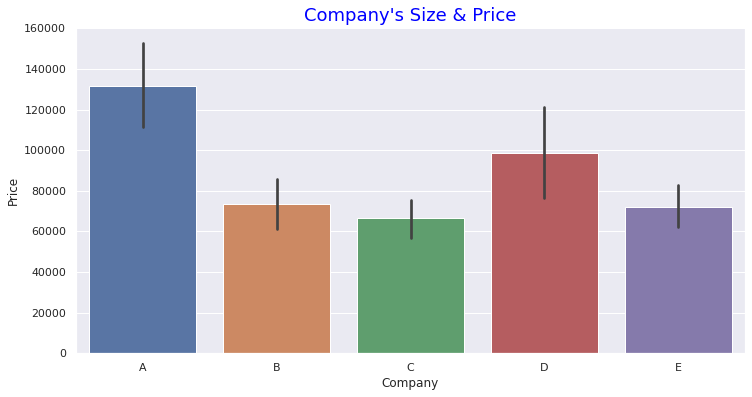

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data= data, x='Company', y= 'Price')
plt.title("Company's Size & Price", fontdict={'color':'blue','fontsize': 18})
plt.show()

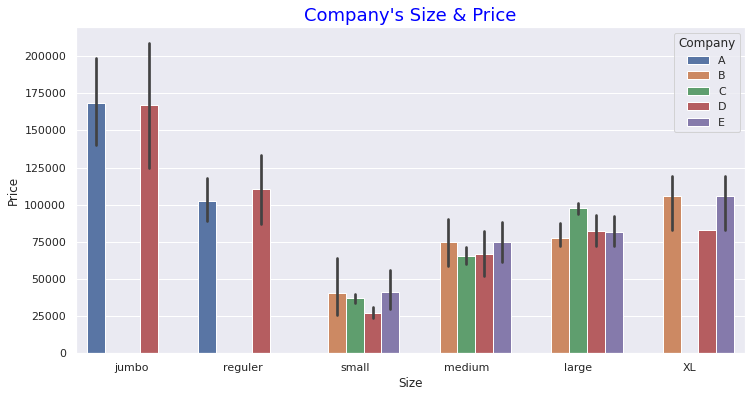

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(data= data, x='Size', y= 'Price', hue='Company')
plt.title("Company's Size & Price", fontdict={'color':'blue','fontsize': 18})
plt.show()

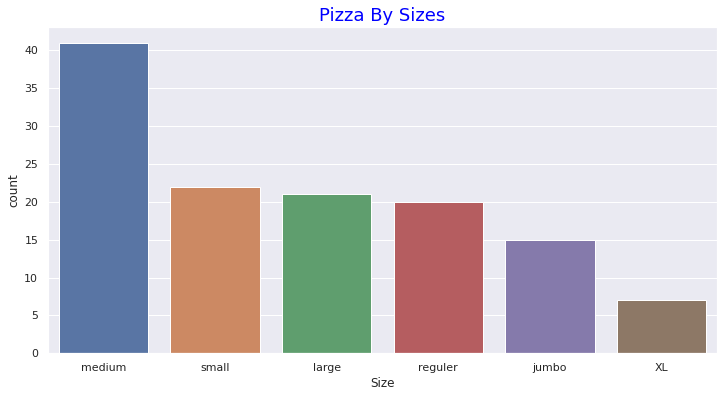

In [14]:
# descending order formations
order_descend = data['Size'].value_counts().index

plt.figure(figsize=(12,6))
sns.countplot(data= data, x='Size', order = order_descend)
plt.title("Pizza By Sizes", fontdict={'color':'blue','fontsize': 18})
plt.show()

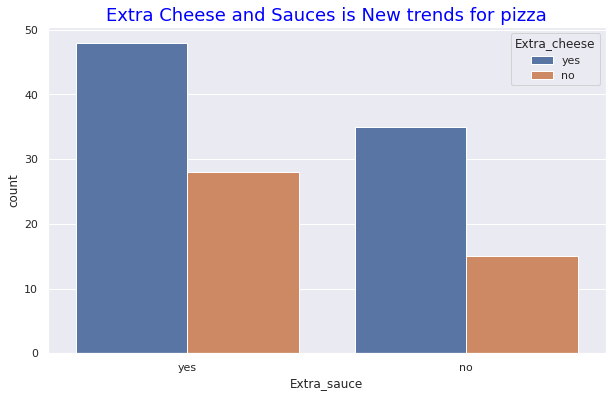

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="Extra_sauce", hue='Extra_cheese')
plt.title('Extra Cheese and Sauces is New trends for pizza', fontdict={'color':'blue','fontsize': 18})
plt.show()

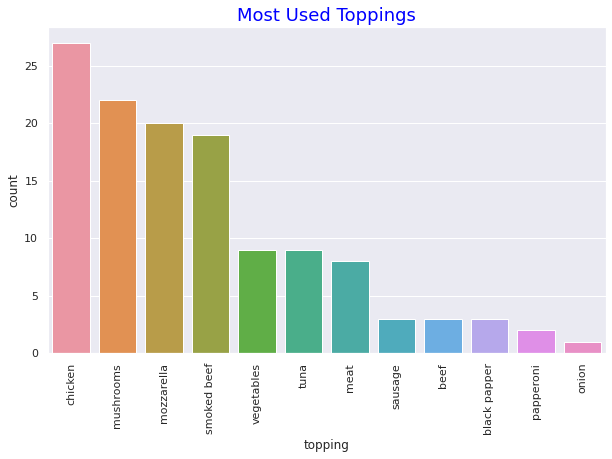

In [16]:
# sorting counts
Top_to_bottom = data['topping'].value_counts().index
# ploting
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="topping", order= Top_to_bottom)
plt.title('Most Used Toppings', fontdict={'color':'blue','fontsize': 18})
plt.xticks(rotation=90)
plt.show()

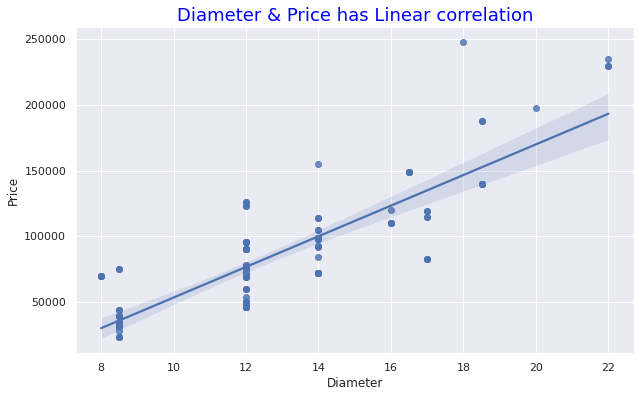

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(x='Diameter', y='Price', data=data)
plt.title('Diameter & Price has Linear correlation', fontdict={'color':'blue','fontsize': 18})
plt.show()

# Model Development

## impoting modules

In [ ]:
!pip install pycaret
!pip install catboost

from pycaret.regression import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import catboost as cb

## Feature Engineering

In [19]:
#onehot encoding:
feature = ['Company','topping','Variant','Size','Extra_sauce','Extra_cheese']

# using pandas get_dummy methods for one hot label encoding
data = pd.get_dummies(data, columns=feature)


In [20]:
data.info()
# data formation is ready for modeling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      126 non-null    float64
 1   Diameter                   126 non-null    float64
 2   Company_A                  126 non-null    uint8  
 3   Company_B                  126 non-null    uint8  
 4   Company_C                  126 non-null    uint8  
 5   Company_D                  126 non-null    uint8  
 6   Company_E                  126 non-null    uint8  
 7   topping_beef               126 non-null    uint8  
 8   topping_black papper       126 non-null    uint8  
 9   topping_chicken            126 non-null    uint8  
 10  topping_meat               126 non-null    uint8  
 11  topping_mozzarella         126 non-null    uint8  
 12  topping_mushrooms          126 non-null    uint8  
 13  topping_onion              126 non-null    uint8  

In [21]:
# Feature Selection:
# Independet feature : Price

x = data.drop(['Price'],axis=1).values
y = data['Price']

## normalization by standard_scalar()

In [22]:
ssr = StandardScaler()
x = ssr.fit_transform(data)

## Splitting Our data into train and test

In [23]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

**PyCaret** is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

In [24]:
clf = setup(data, target = 'Price',normalize=True)

,Description,Value
0,session_id,8008
1,Target,Price
2,Original Data,"(126, 49)"
3,Missing Values,False
4,Numeric Features,48
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(88, 43)"


## PyCaret 
#PyCaret can help to find out highest suitable algorithms

In [25]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,5.929167e+03,1.438819e+08,1.092140e+04,8.798000e-01,0.1275,7.350000e-02,0.032
catboost,CatBoost Regressor,9.731233e+03,3.154292e+08,1.420901e+04,8.645000e-01,0.1451,1.151000e-01,0.672
gbr,Gradient Boosting Regressor,9.151500e+03,2.353480e+08,1.343912e+04,8.611000e-01,0.1330,1.028000e-01,0.099
rf,Random Forest Regressor,1.040581e+04,2.548542e+08,1.418196e+04,8.396000e-01,0.1509,1.244000e-01,0.556
ada,AdaBoost Regressor,1.354203e+04,3.373627e+08,1.643696e+04,8.001000e-01,0.2119,1.902000e-01,0.181
et,Extra Trees Regressor,9.488042e+03,4.018481e+08,1.628087e+04,7.884000e-01,0.1524,1.003000e-01,0.503
br,Bayesian Ridge,1.376505e+04,3.249330e+08,1.703524e+04,7.396000e-01,0.2115,1.818000e-01,0.017
knn,K Neighbors Regressor,1.434625e+04,3.786553e+08,1.807200e+04,7.309000e-01,0.2233,1.898000e-01,0.061
ridge,Ridge Regression,1.396287e+04,3.318339e+08,1.731157e+04,7.295000e-01,0.2157,1.837000e-01,0.013
huber,Huber Regressor,1.337971e+04,3.648976e+08,1.788260e+04,7.260000e-01,0.2089,1.706000e-01,0.033


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=8008, splitter='best')

In [26]:
model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8803.4056,1.201656e+08,10962.0058,0.7052,0.1618,0.1251
1,9427.4857,1.578114e+08,12562.2995,0.8704,0.1204,0.1122
2,13072.8987,4.943128e+08,22233.1470,0.6428,0.2047,0.1387
3,4555.1773,3.695980e+07,6079.4571,0.9669,0.0744,0.0541
4,18463.6990,7.254013e+08,26933.2757,0.8173,0.1805,0.1450
5,5560.2216,4.911506e+07,7008.2137,0.9666,0.1248,0.1040
6,11329.0150,5.452623e+08,23350.8514,0.8381,0.1288,0.0767
7,8036.1120,8.757775e+07,9358.2985,0.9303,0.1235,0.1028
8,4461.2907,3.215081e+07,5670.1682,0.9580,0.0655,0.0545
9,7805.6905,1.047234e+08,10233.4475,0.9158,0.1452,0.1153


RMSE is calculated for evaluating for the cat boost regressor

In [28]:
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)
model = cb.CatBoostRegressor(loss_function="RMSE")
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)
pred = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)

Streaming output truncated to the last 5000 lines.
156:	learn: 4112.8144053	test: 14533.2906225	best: 14533.2906225 (156)	total: 85.1ms	remaining: 23.3ms
157:	learn: 4046.6726921	test: 14459.5109299	best: 14459.5109299 (157)	total: 85.6ms	remaining: 22.7ms
158:	learn: 3989.6362609	test: 14402.5563416	best: 14402.5563416 (158)	total: 86ms	remaining: 22.2ms
159:	learn: 3938.4517629	test: 14343.6330831	best: 14343.6330831 (159)	total: 86.4ms	remaining: 21.6ms
160:	learn: 3887.8463708	test: 14272.1958350	best: 14272.1958350 (160)	total: 86.9ms	remaining: 21ms
161:	learn: 3831.0585457	test: 14219.6355892	best: 14219.6355892 (161)	total: 87.3ms	remaining: 20.5ms
162:	learn: 3781.5513818	test: 14169.7012100	best: 14169.7012100 (162)	total: 87.6ms	remaining: 19.9ms
163:	learn: 3730.7945412	test: 14118.5871832	best: 14118.5871832 (163)	total: 88.1ms	remaining: 19.3ms
164:	learn: 3687.2878997	test: 14072.5351152	best: 14072.5351152 (164)	total: 88.4ms	remaining: 18.8ms
165:	learn: 3632.1690831	t

In [29]:
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

RMSE: 16543.39
R2: 0.90


<center><b>Thank you for reading this notebook.</b></center>